In [34]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load data
bank_info = pd.read_csv('bank-additional-full.csv', delimiter=";")
bank_info.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
age = bank_info.age
duration = bank_info.duration
call_time = bank_info.campaign
prev_contact = bank_info.previous
euribor3m = bank_info.euribor3m

In [4]:
j = bank_info.job
job = pd.get_dummies(j)
job.drop([job.columns[0]], axis=1, inplace=True)

In [5]:
pd.options.mode.chained_assignment = None

In [6]:
m = bank_info.marital
#m[(m == 'divorced')|(m == 'married')].loc[:]= 'married_current_or_before'?
m[(m == 'divorced')|(m == 'married')] = 'married_current_or_before'
m[(m == 'single') | (m == 'unknown')] = 'not_married'
marital = pd.get_dummies(m)
marital.drop([marital.columns[0]], axis=1, inplace=True)

In [7]:
e = bank_info.education
e[(e == 'illiterate')|(e == 'basic.4y')|(e == 'basic.6y')|(e == 'basic.9y')]= 'high_school_below'
e[(e == 'university.degree')|(e == 'professional.course')|(e == 'unknown')] = 'high_school_above'
education = pd.get_dummies(e)
education.drop([education.columns[0]], axis=1, inplace=True)

In [8]:
contact = pd.get_dummies(bank_info.contact)
contact.drop([contact.columns[0]], axis=1, inplace=True)

In [9]:
ne = bank_info['nr.employed']
ne[(ne == 4963.6)|(ne == 4991.6)|(ne == 5008.7)|(ne == 5017.5)|(ne == 5023.5)|(ne == 5076.2)] = '5099_below'
ne[(ne == 5176.3)|(ne == 5191.0)|(ne == 5195.8)|(ne == 5228.1)] = '5100_above'
number_employed = pd.get_dummies(ne)
number_employed.drop([number_employed.columns[0]], axis=1, inplace=True)

In [10]:
month = pd.get_dummies(bank_info.month)
month.drop([month.columns[0]], axis=1, inplace=True)

In [11]:
day_of_week = pd.get_dummies(bank_info.day_of_week)
day_of_week.drop([day_of_week.columns[0]], axis=1, inplace=True)

In [12]:
p = bank_info.pdays
p[p != 999] = '0-27'
last_contact = pd.get_dummies(p)
last_contact.drop([last_contact.columns[0]], axis=1, inplace=True)

In [13]:
prev_outcome = pd.get_dummies(bank_info.poutcome)
prev_outcome.drop([prev_outcome.columns[0]], axis=1, inplace=True)

In [14]:
emp_var_rate = pd.get_dummies(bank_info['emp.var.rate'])
emp_var_rate.drop([emp_var_rate.columns[0]], axis=1, inplace=True)
cons_price_idx  = pd.get_dummies(bank_info['cons.price.idx'])
cons_price_idx.drop([cons_price_idx.columns[0]], axis=1, inplace=True)
cons_conf_idx = pd.get_dummies(bank_info['cons.conf.idx'])
cons_conf_idx.drop([cons_conf_idx.columns[0]], axis=1, inplace=True)

In [15]:
hou_loan = pd.get_dummies(bank_info.housing)
hou_loan.drop([hou_loan.columns[0]], axis=1, inplace=True)
per_loan = pd.get_dummies(bank_info.loan)
per_loan.drop([per_loan.columns[0]], axis=1, inplace=True)

In [16]:
defa = bank_info.default
defa[defa == 'yes'] = 'unknown'
default = pd.get_dummies(defa)
default.drop([default.columns[0]], axis=1, inplace=True)

In [17]:
output = pd.get_dummies(bank_info.y).yes

In [47]:
data = pd.concat([age, job, marital, education, default, hou_loan, per_loan, contact, month, 
                  duration, call_time, day_of_week, last_contact, prev_contact, prev_outcome, 
                  emp_var_rate, number_employed, euribor3m, output], axis=1)
pd.set_option('display.max_columns', None)
data.head()

,age,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,not_married,high_school_above,high_school_below,unknown,unknown,yes,unknown,yes,telephone,aug,dec,jul,jun,mar,may,nov,oct,sep,duration,campaign,mon,thu,tue,wed,0-27,previous,nonexistent,success,-3.0,-2.9,-1.8,-1.7,-1.1,-0.2,-0.1,1.1,1.4,5099_below,5100_above,euribor3m,yes
0,56,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,261,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,4.857,0
1,57,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,149,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,4.857,0
2,37,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,226,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,4.857,0
3,40,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,151,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,4.857,0
4,56,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,307,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,4.857,0


In [48]:
data=np.array(data)
n = data.shape[0]
d = data.shape[1]
d -= 1
n_train = int(n*0.7)
n_test = int(n*0.2)
n_validate  = n - n_train - n_test
data = np.random.permutation(data)

X_train = np.zeros((n_train,d))
X_test  = np.zeros((n_test,d))
X_validate = np.zeros((n_validate,d))
Y_train = np.zeros((n_train))
Y_test = np.zeros((n_test))
Y_validate = np.zeros((n_validate))

X_train[:] = data[:n_train,:-1]
Y_train[:] = data[:n_train,-1]

X_test[:] = data[n_train:(n_train+n_test),:-1]
Y_test[:] = data[n_train:(n_train+n_test),-1]

X_validate[:] = data[(n_train+n_test):, :-1]
Y_validate[:] = data[(n_train+n_test):,-1]

print(X_train.shape)
print(X_test.shape)
print(X_validate.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_validate.shape)

(28831, 52)
(8237, 52)
(4120, 52)
(28831,)
(8237,)
(4120,)


In [21]:
number = np.array(range(0,8237))
number

array([   0,    1,    2, ..., 8234, 8235, 8236])

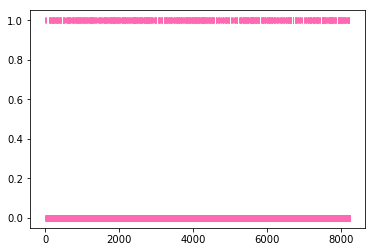

In [49]:
model1 = LogisticRegression()
model1.fit(X_train, Y_train)
probability = model1.predict_proba(X_test)[:,1]
#prob_sorted = sorted(probability)
plt.plot(number, Y_test, '|', color ='hotpink')
#plt.plot(number, probability, '.', color ='black')

In [50]:
print(model1.score(X_test, Y_test))

0.913075148719


In [40]:
#report for including all the data
print(classification_report(y_true=Y_test, y_pred=model1.predict(X_test), target_names=['no', 'yes']))

             precision    recall  f1-score   support

         no       0.93      0.97      0.95      7303
        yes       0.69      0.45      0.55       934

avg / total       0.90      0.91      0.91      8237



In [46]:
#report for excluding housing loan and personal loan
print(classification_report(y_true=Y_test, y_pred=model1.predict(X_test), target_names=['no', 'yes']))

             precision    recall  f1-score   support

         no       0.93      0.97      0.95      7278
        yes       0.68      0.42      0.52       959

avg / total       0.90      0.91      0.90      8237



In [51]:
#report for excluding cons_price_idx and cons_conf_idx
print(classification_report(y_true=Y_test, y_pred=model1.predict(X_test), target_names=['no', 'yes']))

             precision    recall  f1-score   support

         no       0.93      0.98      0.95      7296
        yes       0.70      0.41      0.52       941

avg / total       0.90      0.91      0.90      8237

